## Part 1. Orpita's Question
There are 3 csv files: Countrylist, provinces and regionlist. The regionlist has multiple levels of hierarchy. 
Our goal is to see when a region id is entered we know - region_name, province_name, country_name <br><i>But,</i> we have to use an SQL statement and not a function with loop structure

In [2]:
import pandas as pd
import sqlite3
import numpy as np

regionlist_df = pd.read_csv(r'C:\Users\Kshitij\Desktop\MySql\Orpita\regionlist.csv')
countrylist_df = pd.read_csv(r'C:\Users\Kshitij\Desktop\MySql\Orpita\countrylist.csv')
provinces_df = pd.read_csv(r'C:\Users\Kshitij\Desktop\MySql\Orpita\provinces.csv')

We have imported the csv files as dataframe

In [3]:
## taking pandas to db
new_con = sqlite3.connect(r"C:\Users\Kshitij\Desktop\Lantern Prac\orpita_.db")
cur = new_con.cursor()

regionlist_df.to_sql('regionlist_df', new_con)

countrylist_df.to_sql('countrylist_df', new_con)

provinces_df.to_sql('provinces_df', new_con)


In [4]:
pd.read_sql_query('select * from sqlite_master', new_con)

,type,name,tbl_name,rootpage,sql
0,table,regionlist_df,regionlist_df,2,"CREATE TABLE ""regionlist_df"" (\n""index"" INTEGE..."
1,index,ix_regionlist_df_index,regionlist_df,3,"CREATE INDEX ""ix_regionlist_df_index""ON ""regio..."
2,table,countrylist_df,countrylist_df,431,"CREATE TABLE ""countrylist_df"" (\n""index"" INTEG..."
3,index,ix_countrylist_df_index,countrylist_df,432,"CREATE INDEX ""ix_countrylist_df_index""ON ""coun..."
4,table,provinces_df,provinces_df,433,"CREATE TABLE ""provinces_df"" (\n""index"" INTEGER..."
5,index,ix_provinces_df_index,provinces_df,434,"CREATE INDEX ""ix_provinces_df_index""ON ""provin..."


Let us see the table contents from regionlist table

In [7]:
cur.execute("SELECT  * FROM regionlist_df LIMIT 5")
cur.fetchall()

[(0, 3000432767, 'City', None, None, 'Bury', 'Bury, Quebec, Canada', 11183),
 (1,
  6213185,
  'Metro Station',
  None,
  None,
  'Queen Station',
  'Queen Station, Toronto, Ontario, Canada',
  6057934),
 (2, 31, 'Country', None, None, 'Canada', 'Canada', 500001),
 (3, 11111, 'Province (State)', None, None, 'Alberta', 'Alberta, Canada', 31),
 (4,
  11117,
  'Province (State)',
  None,
  None,
  'British Columbia',
  'British Columbia, Canada',
  31)]

Working with SQL in PYTHON does not always produce beautiful results but above are the top 5  rows from regionallist. <br>
We will use the self join to join the table on parentregionid with its regionid. For region, province, country we would use 4 levels of innerjoin

In [10]:
cur.execute('''SELECT l1.regionid as Region_id, 
                    l4.regionname as Level_4, 
                    l3.regionname as Level_3, 
                    l2.regionname as level_2, 
                    l1.regionname as level_1
                FROM regionlist_df l1
                LEFT JOIN regionlist_df l2 on l2.regionid = l1.parentregionid
                LEFT JOIN regionlist_df l3 on l3.regionid = l2.parentregionid
                LEFT JOIN regionlist_df l4 on l4.regionid = l3.parentregionid
                

                limit 10;''')
cur.fetchall() # let's see how the table looks

[(3000432767, None, 'Canada', 'Quebec', 'Bury'),
 (6213185,
  'Toronto',
  'University District',
  'Downtown Toronto',
  'Queen Station'),
 (31, None, None, None, 'Canada'),
 (11111, None, None, 'Canada', 'Alberta'),
 (11117, None, None, 'Canada', 'British Columbia'),
 (11148, None, None, 'Canada', 'Manitoba'),
 (11161, None, None, 'Canada', 'New Brunswick'),
 (11167, None, None, 'Canada', 'Newfoundland and Labrador'),
 (11172, None, None, 'Canada', 'Northwest Territories'),
 (11173, None, None, 'Canada', 'Nova Scotia')]

We could now use the <b>where statement</b> to find the details, and we could create a <b>function</b> to input the region id

In [11]:
def Orpita_problem(): 
    reg_id = input('Enter region_id')
    query = '''SELECT l1.regionid, l4.regionname, l3.regionname, l2.regionname, l1.regionname
                FROM regionlist_df l1
                LEFT JOIN regionlist_df l2 on l2.regionid = l1.parentregionid
                LEFT JOIN regionlist_df l3 on l3.regionid = l2.parentregionid
                LEFT JOIN regionlist_df l4 on l4.regionid = l3.parentregionid
                WHERE L1.regionid = {0}

                limit 10;'''.format(reg_id)
    cur.execute(query)
    tup = cur.fetchall()
    
    return(tup)
Orpita_problem()

Enter region_id553248621593511000


[(553248621593511000, None, None, 'Canada', 'Canadian Rocky Mountain Parks'),
 (553248621593511000, None, None, 'Canada', 'Ninstints'),
 (553248621593511000, None, None, 'Canada', 'Thunder Hill Ski Area'),
 (553248621593511000, None, 'Canada', 'British Columbia', 'Nonda Peak'),
 (553248621593511000,
  None,
  'Canada',
  'Manitoba',
  'Duck Mountain Provincial Park'),
 (553248621593511000, None, 'Canada', 'Manitoba', 'Falcon Ridge Ski Slopes'),
 (553248621593511000, None, 'Canada', 'Ontario', 'Ganaraska Forest'),
 (553248621593511000, None, 'Canada', 'Ontario', 'Haliburton Highlands'),
 (553248621593511000, None, 'Canada', 'Quebec', "The King's Road"),
 (553248621593511000, None, 'Canada', 'Quebec', 'The Navigators Route')]

__Conlclusion__: Here we have tried to utilize both <b>SQLite3</b> and <b>PYTHON</b> to return the description of a region. <br>The function would return the complete region address, but when the fields would be missing for Level 2 onwards it would return a NoneType

## Part 2. Pokemon DB :

I have downloaded the "pokedex.sqlite" db from : https://www.dropbox.com/s/dhcz0ryqoxeqqrf/pokedex.sqlite?dl=0

And I will try to explore and see what is in the DB:

In [2]:
import os
os.chdir(r"C:\Users\Kshitij\Desktop\Lantern Prac")

In [3]:
import sqlite3
con = sqlite3.connect("./pokedex.sqlite")
cur=con.cursor()

In [4]:
# Let us see the list of tables in the DB
cur.execute("SELECT name FROM sqlite_master WHERE type='table';")
cur.fetchall()

[('conquest_move_displacements',),
 ('encounter_methods',),
 ('move_targets',),
 ('berry_firmness',),
 ('pokemon_move_methods',),
 ('conquest_warrior_stats',),
 ('item_flags',),
 ('item_fling_effects',),
 ('item_pockets',),
 ('move_damage_classes',),
 ('evolution_triggers',),
 ('contest_effects',),
 ('pokemon_habitats',),
 ('genders',),
 ('super_contest_effects',),
 ('conquest_move_ranges',),
 ('move_meta_categories',),
 ('egg_groups',),
 ('conquest_episodes',),
 ('contest_types',),
 ('move_flags',),
 ('conquest_warrior_archetypes',),
 ('conquest_stats',),
 ('encounter_conditions',),
 ('pokemon_colors',),
 ('move_battle_styles',),
 ('pal_park_areas',),
 ('move_effects',),
 ('regions',),
 ('conquest_move_effects',),
 ('growth_rates',),
 ('languages',),
 ('pokeathlon_stats',),
 ('conquest_warrior_skills',),
 ('pokemon_shapes',),
 ('move_meta_ailments',),
 ('stats',),
 ('conquest_warrior_skill_names',),
 ('conquest_move_displacement_prose',),
 ('pokemon_color_names',),
 ('encounter_condit

### Types :

In [6]:
cur.execute('SELECT * FROM language_names')
cur.fetchall()

[(1, 1, '日本語'),
 (1, 9, 'Japanese'),
 (2, 1, '正式ローマジ'),
 (2, 9, 'Official roomaji'),
 (3, 1, '韓国語'),
 (3, 9, 'Korean'),
 (4, 1, '中国語'),
 (4, 9, 'Chinese'),
 (5, 1, 'フランス語'),
 (5, 9, 'French'),
 (6, 1, 'ドイツ語'),
 (6, 9, 'German'),
 (7, 1, '西語'),
 (7, 9, 'Spanish'),
 (8, 1, '伊語'),
 (8, 9, 'Italian'),
 (9, 1, '英語'),
 (9, 9, 'English'),
 (10, 1, 'チェコ語'),
 (10, 9, 'Czech')]

In [5]:
# I will write a query to output the type_id, name for different type of Pokemon and only when the language is English.

cur.execute('''SELECT types.id, types.identifier 
                FROM types
                INNER JOIN type_names
                ON types.id = type_names.type_id
                WHERE type_names.local_language_id = 9''') # language_id for english is 9
cur.fetchall()


[(1, 'normal'),
 (2, 'fighting'),
 (3, 'flying'),
 (4, 'poison'),
 (5, 'ground'),
 (6, 'rock'),
 (7, 'bug'),
 (8, 'ghost'),
 (9, 'steel'),
 (10, 'fire'),
 (11, 'water'),
 (12, 'grass'),
 (13, 'electric'),
 (14, 'psychic'),
 (15, 'ice'),
 (16, 'dragon'),
 (17, 'dark'),
 (10001, 'unknown'),
 (10002, 'shadow')]

We know that id for english is 9

### Gen 1 moves :

In [7]:
# Now I will write a query to output the name of the move and name of the type for Generation 1 Pokemon. 
cur.execute("""SELECT moves.identifier, type_names.name
            FROM moves
            JOIN type_names
            ON type_names.type_id = moves.type_id
            WHERE moves.generation_id = 1 AND type_names.local_language_id = 9
            ORDER BY moves.type_id""")
cur.fetchall()



[('pound', 'Normal'),
 ('doubleslap', 'Normal'),
 ('comet-punch', 'Normal'),
 ('mega-punch', 'Normal'),
 ('pay-day', 'Normal'),
 ('scratch', 'Normal'),
 ('vicegrip', 'Normal'),
 ('guillotine', 'Normal'),
 ('razor-wind', 'Normal'),
 ('swords-dance', 'Normal'),
 ('cut', 'Normal'),
 ('whirlwind', 'Normal'),
 ('bind', 'Normal'),
 ('slam', 'Normal'),
 ('stomp', 'Normal'),
 ('mega-kick', 'Normal'),
 ('headbutt', 'Normal'),
 ('horn-attack', 'Normal'),
 ('fury-attack', 'Normal'),
 ('horn-drill', 'Normal'),
 ('tackle', 'Normal'),
 ('body-slam', 'Normal'),
 ('wrap', 'Normal'),
 ('take-down', 'Normal'),
 ('thrash', 'Normal'),
 ('double-edge', 'Normal'),
 ('tail-whip', 'Normal'),
 ('leer', 'Normal'),
 ('growl', 'Normal'),
 ('roar', 'Normal'),
 ('sing', 'Normal'),
 ('supersonic', 'Normal'),
 ('sonicboom', 'Normal'),
 ('disable', 'Normal'),
 ('hyper-beam', 'Normal'),
 ('strength', 'Normal'),
 ('growth', 'Normal'),
 ('quick-attack', 'Normal'),
 ('rage', 'Normal'),
 ('mimic', 'Normal'),
 ('screech', '

### It is hard to write custome queries each time. Lets use the power of Pandas/Python by getting everything into Pandas DF:

In [8]:
# Task: Use "for loops" to read each table in the DB and store it as a df with the same name as the table.
# Let us invoke the mighty pandas!!
import pandas as pd
df = pd.read_sql_query('select * from sqlite_master', con)
tbl_list = list(df[df['type'] == 'table']['name'])


for table in tbl_list:
    globals()['%s_df' % table] = pd.read_sql_query('select * from {0}'.format(table), con)
    print('{0}_df'.format(table))


conquest_move_displacements_df
encounter_methods_df
move_targets_df
berry_firmness_df
pokemon_move_methods_df
conquest_warrior_stats_df
item_flags_df
item_fling_effects_df
item_pockets_df
move_damage_classes_df
evolution_triggers_df
contest_effects_df
pokemon_habitats_df
genders_df
super_contest_effects_df
conquest_move_ranges_df
move_meta_categories_df
egg_groups_df
conquest_episodes_df
contest_types_df
move_flags_df
conquest_warrior_archetypes_df
conquest_stats_df
encounter_conditions_df
pokemon_colors_df
move_battle_styles_df
pal_park_areas_df
move_effects_df
regions_df
conquest_move_effects_df
growth_rates_df
languages_df
pokeathlon_stats_df
conquest_warrior_skills_df
pokemon_shapes_df
move_meta_ailments_df
stats_df
conquest_warrior_skill_names_df
conquest_move_displacement_prose_df
pokemon_color_names_df
encounter_condition_prose_df
item_fling_effect_prose_df
pokedexes_df
evolution_trigger_prose_df
experience_df
berry_firmness_names_df
move_meta_ailment_names_df
move_effect_prose_

__Conclusion__: We have successfully explored the functioning of SQL inside the PYTHON and have also learnt how to convert SQL tables into Pandas DataFrame

## Part 3. Back to Pandas, some data exploration :

I will download another Pokemon dataset from :https://www.dropbox.com/s/ms0tixxeflq1toc/Pokemon.csv?dl=0 
Lets explore:

In [28]:
df = pd.read_csv('Pokemon.csv')
df.head()

,#,Name,Type 1,Type 2,Total,HP,Attack,Defense,Sp. Atk,Sp. Def,Speed,Generation,Legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [29]:
#Let's rename the # column to id, and convert all column labels to lower case.
df.rename(columns={"#": "id"}, inplace = True)
df.columns = map(str.lower, df.columns)
df.head()

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
0,1,Bulbasaur,Grass,Poison,318,45,49,49,65,65,45,1,False
1,2,Ivysaur,Grass,Poison,405,60,62,63,80,80,60,1,False
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
4,4,Charmander,Fire,NaN,309,39,52,43,60,50,65,1,False


In [30]:
#Now let's take a look at any duplicated rows via the id column.

df[df.duplicated('id', keep=False)]

,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary
2,3,Venusaur,Grass,Poison,525,80,82,83,100,100,80,1,False
3,3,VenusaurMega Venusaur,Grass,Poison,625,80,100,123,122,120,80,1,False
6,6,Charizard,Fire,Flying,534,78,84,78,109,85,100,1,False
7,6,CharizardMega Charizard X,Fire,Dragon,634,78,130,111,130,85,100,1,False
8,6,CharizardMega Charizard Y,Fire,Flying,634,78,104,78,159,115,100,1,False
11,9,Blastoise,Water,NaN,530,79,83,100,85,105,78,1,False
12,9,BlastoiseMega Blastoise,Water,NaN,630,79,103,120,135,115,78,1,False
18,15,Beedrill,Bug,Poison,395,65,90,40,45,80,75,1,False
19,15,BeedrillMega Beedrill,Bug,Poison,495,65,150,40,15,80,145,1,False
22,18,Pidgeot,Normal,Flying,479,83,80,75,70,70,101,1,False


In [31]:
# Lets exclude these duplicates in our analysis except for the first instance.

df.drop_duplicates('id',inplace = True)

df[df.duplicated('id', keep=False)]


,id,name,type 1,type 2,total,hp,attack,defense,sp. atk,sp. def,speed,generation,legendary


In [32]:
import numpy as np
df['type 2']

0      Poison
1      Poison
2      Poison
4         NaN
5         NaN
6      Flying
9         NaN
10        NaN
11        NaN
13        NaN
14        NaN
15     Flying
16     Poison
17     Poison
18     Poison
20     Flying
21     Flying
22     Flying
24        NaN
25        NaN
26     Flying
27     Flying
28        NaN
29        NaN
30        NaN
31        NaN
32        NaN
33        NaN
34        NaN
35        NaN
        ...  
762       NaN
763       NaN
764    Normal
765    Normal
766    Dragon
767    Dragon
768       Ice
769       Ice
770       NaN
771    Flying
772     Fairy
773     Fairy
774       NaN
775       NaN
776       NaN
777     Fairy
778     Grass
779     Grass
780     Grass
784     Grass
788       NaN
789       NaN
790    Dragon
791    Dragon
792       NaN
793    Flying
794    Ground
795     Fairy
797     Ghost
799     Water
Name: type 2, Length: 721, dtype: object

In [33]:
df['type 2'].fillna('None', inplace = True)
df['type 2'].head()

0    Poison
1    Poison
2    Poison
4      None
5      None
Name: type 2, dtype: object

In [34]:
#The dataset contains both information regarding the identity and statistics of each Pokemon species; therefore, 
#let's separate these two observational units into separate tables: pokedex and statistics.
pokedex = df[['id', 'name', 'type 1', 'type 2', 'generation', 'legendary']].copy()
pokedex.head(4)

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
4,4,Charmander,Fire,None,1,False


In [35]:
poke_statistics = df[['id', 'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed','total']]

In [36]:
poke_statistics.describe()

,id,hp,attack,defense,sp. atk,sp. def,speed,total
count,721.00000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,361.00000,68.380028,75.124827,70.697642,68.848821,69.180305,65.714286,417.945908
std,208.27906,25.848272,29.070335,29.194941,28.898590,26.899364,27.277920,109.663671
min,1.00000,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000,180.000000
25%,181.00000,50.000000,54.000000,50.000000,45.000000,50.000000,45.000000,320.000000
50%,361.00000,65.000000,75.000000,65.000000,65.000000,65.000000,65.000000,424.000000
75%,541.00000,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000,499.000000
max,721.00000,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000,720.000000


### Now we have a clean dataset. 
### Lets see : How are Pokemon numbers distributed across generations?

In [37]:
pokedex.groupby('generation').describe()['id']

,count,mean,std,min,25%,50%,75%,max
generation,,,,,,,,
1,151.0,76.0,43.734045,1.0,38.50,76.0,113.50,151.0
2,100.0,201.5,29.011492,152.0,176.75,201.5,226.25,251.0
3,135.0,319.0,39.115214,252.0,285.50,319.0,352.50,386.0
4,107.0,440.0,31.032241,387.0,413.50,440.0,466.50,493.0
5,156.0,571.5,45.177428,494.0,532.75,571.5,610.25,649.0
6,72.0,685.5,20.928450,650.0,667.75,685.5,703.25,721.0


Text(0, 0.5, '# of Pokemon')

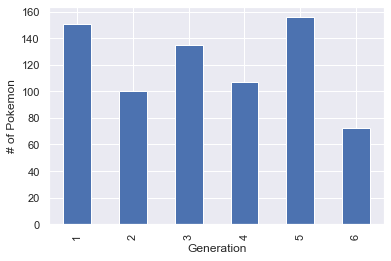

In [38]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
pokedex.groupby('generation').describe()['id']['count'].plot(kind = 'bar')
plt.xlabel('Generation')
plt.ylabel('# of Pokemon')

### Try Seaboarn:

In [39]:
import seaborn as sns

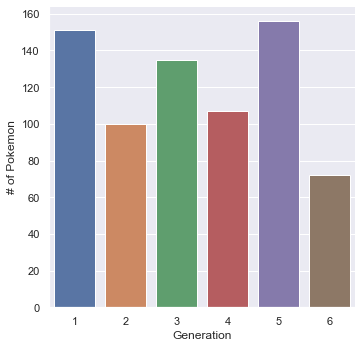

In [40]:
sns.catplot(kind='count', data=pokedex, x='generation').set_axis_labels("Generation", "# of Pokemon")

#### There doesn't seem to be a trend across generations; however, even-numbered generations introduced fewer Pokemon as compared to the odd-numbered generations.

#### Let's dig a bit deeper and examine the distribution of primary types of Pokemon across generations.

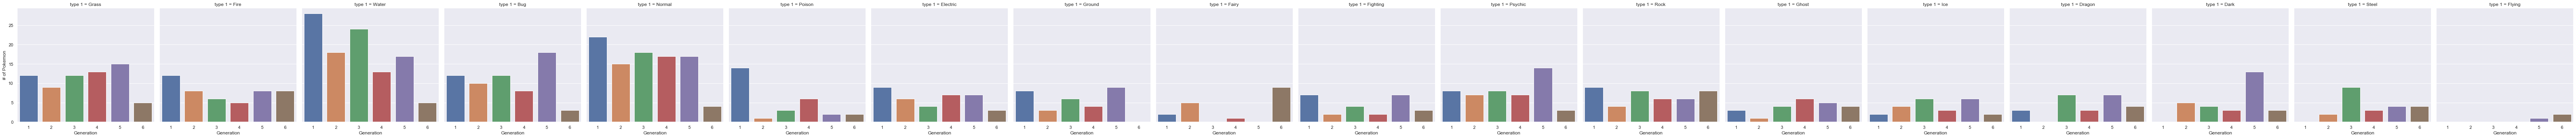

In [41]:
sns.catplot(kind='count', 
              data=pokedex, 
              col='type 1',
              x='generation').set_axis_labels("Generation", "# of Pokemon")

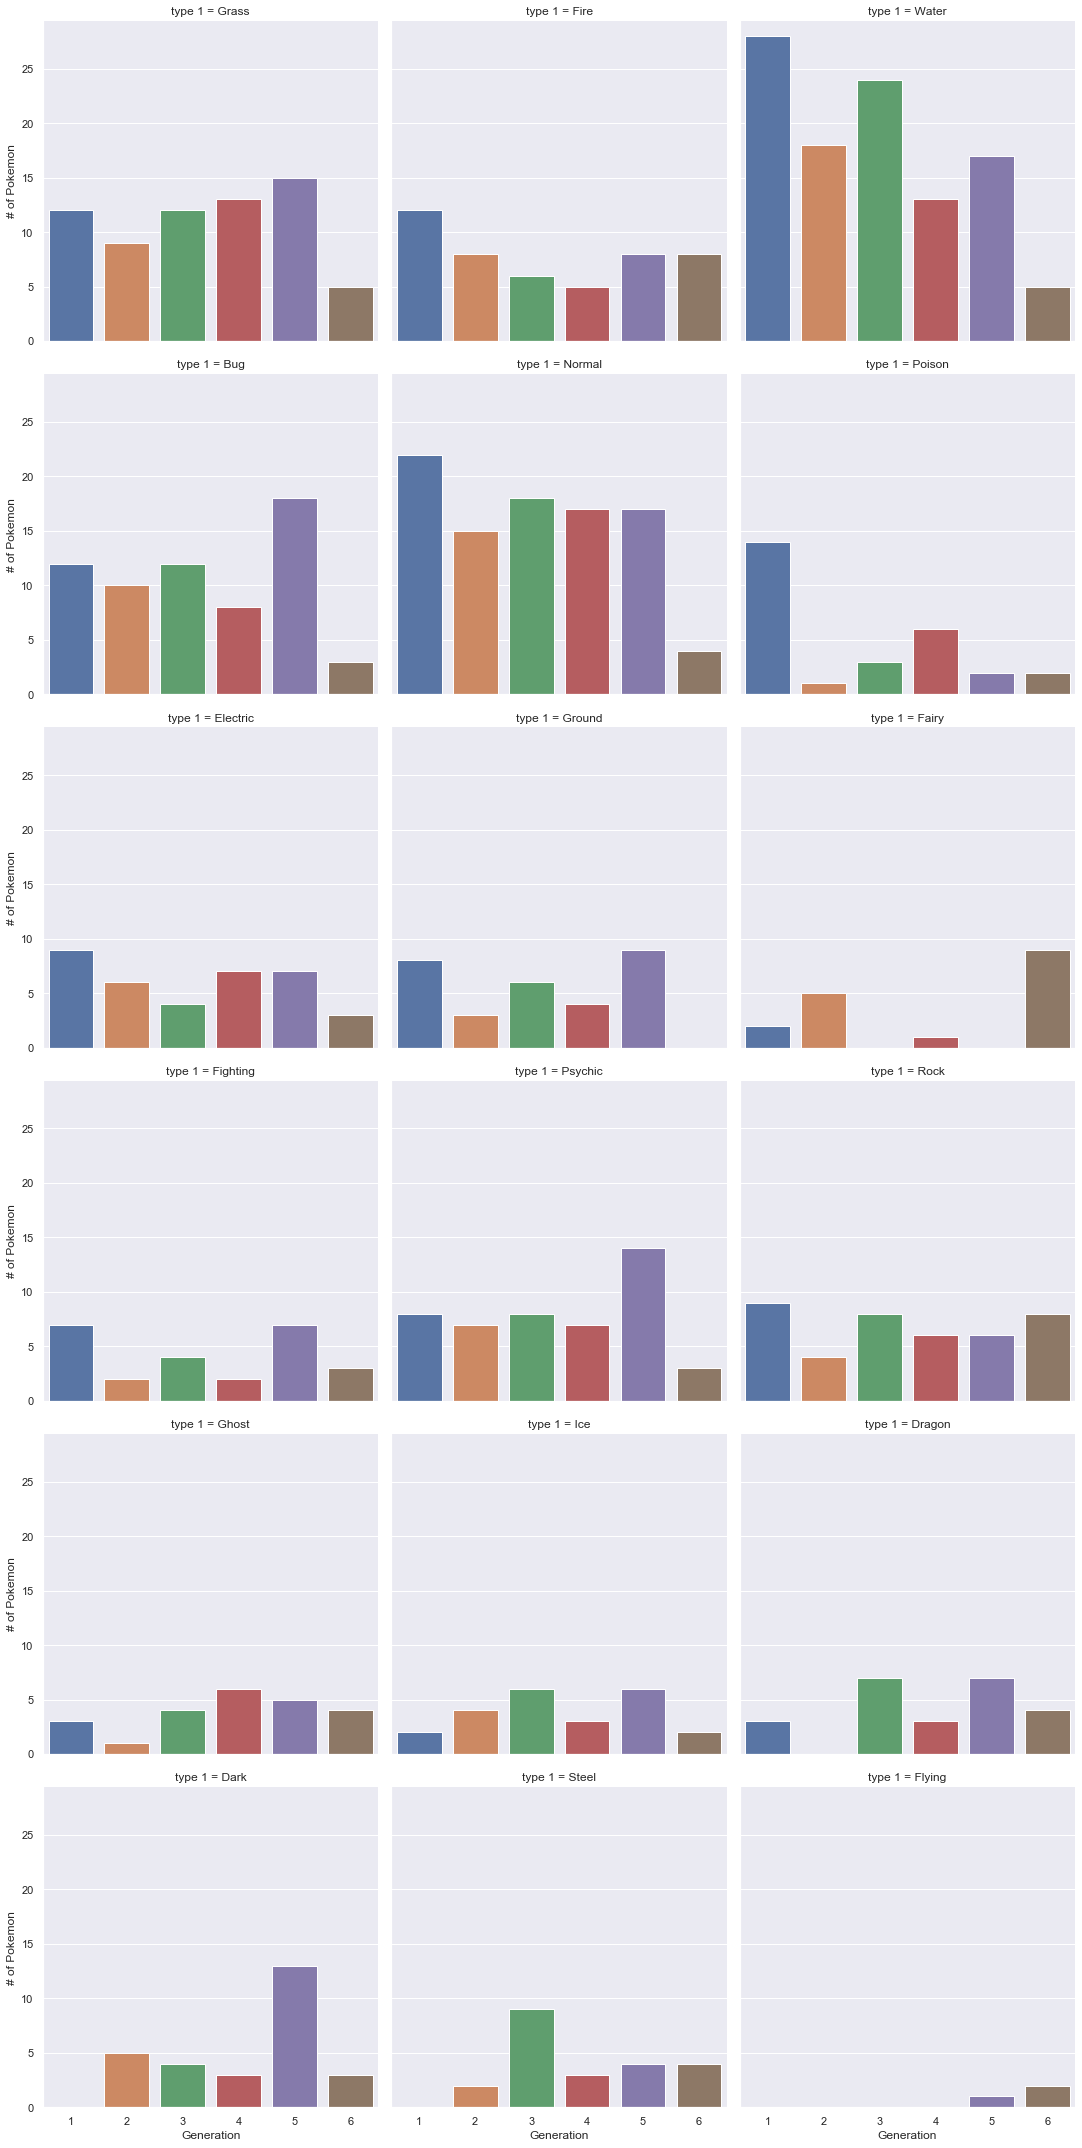

In [42]:
# Add col_wrap option to the above to get below (look into sb.factorplot documentation)
sns.catplot(kind='count', 
              data=pokedex, 
              col='type 1',
              col_wrap = 3,
              x='generation').set_axis_labels("Generation", "# of Pokemon")

__Conclusion 3.1__: We observe a lot of variation across the generation for various Pokemon types. Some important observations are:
* The water type Pokemons saw maximum decline over the generations, they were the highest in Generation 1 but their counts dwindled significantly by Generation 6
* The Flying type has been most rare in the Pokemons across all the generations, the reason might be that the Flying type is often Type 2 for many pokmenons or that the flying pokemons were not covered in the database
* Fighiting and Dragon type, though small, but have been fairly consistent in their numbers across the generations

### Are there unique primary or secondary Pokemon types, or if they simply share the same ones.

In [43]:
import numpy as np
#Return the sorted, unique values in `ar1` that are not in `ar2`.
np.setdiff1d?


In [44]:
unique_type1 =  np.setdiff1d(pokedex['type 1'], pokedex['type 2'])
unique_type1

array([], dtype=object)

In [45]:
unique_type2 =  np.setdiff1d(pokedex['type 2'], pokedex['type 1'])
unique_type2

array(['None'], dtype=object)

In [46]:
### There are no unique primary or secondary types

In [47]:
# Get The total number of primary and secondary types:
print('# of Type 1 Pokemon:',pokedex['type 1'].nunique())
print('# of Type 2 Pokemon:',pokedex['type 2'].nunique())

# of Type 1 Pokemon: 18
# of Type 2 Pokemon: 19


### What are the most common types of Pokemon?

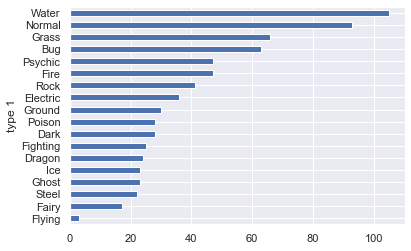

In [48]:
# Make a plot of the distribution of the Type 1 Pokemon. 

#Sort the DB so that we see it in an ascending order !
pokedex.groupby('type 1').count()['id'].sort_values().plot.barh()

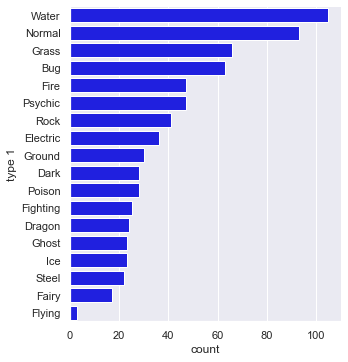

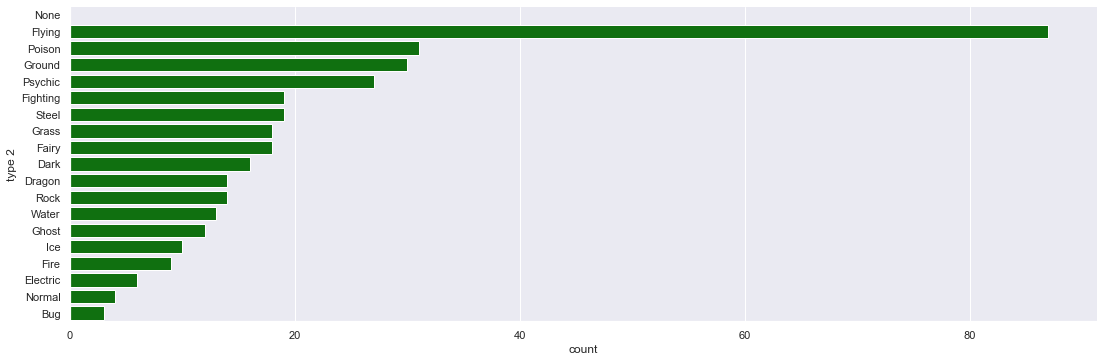

In [49]:
# Now try Seaborn:
sns.catplot(data=pokedex,
               y='type 1',
                kind='count',
                 order = pokedex['type 1'].value_counts().index,
                 color='blue',
                     aspect=1)

sns.catplot(data=pokedex[pokedex['type 2'] != 'None'],
               y='type 2',
                kind='count',
                 order = pokedex['type 2'].value_counts().index,
                 color='green',
                     aspect=3.1)

__Conclusion 3.2__: The above observations supplements our findings from 3.1:
* We were correct in assuming that Flying is more common as a Type 2 feature in pokemons
* For the majority pokemons Water is a more common Type 1 trait than Normal
* Importantly, the features which are more frequent in type 1 tend to be less frequent in type 2 and vice versa

### But we can not say which type maps into which type !

Lets create a heatmap !

In [50]:
# Create a new df called "dual_types" by getting rid of the records for which we do not have Type 2
dual_types = pokedex[pokedex['type 2'] != 'None']
dual_types

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
6,6,Charizard,Fire,Flying,1,False
15,12,Butterfree,Bug,Flying,1,False
16,13,Weedle,Bug,Poison,1,False
17,14,Kakuna,Bug,Poison,1,False
18,15,Beedrill,Bug,Poison,1,False
20,16,Pidgey,Normal,Flying,1,False
21,17,Pidgeotto,Normal,Flying,1,False


In [51]:
# Get a grid of values from 'type 1' 'type 2'  
dual_types[['type 1','type 2']].nunique().values

array([18, 18], dtype=int64)

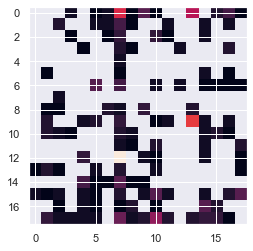

In [52]:
# Try matplotlib imshow as a way to get a heatmap, something like this:
plt.imshow(dual_types.groupby(['type 1','type 2']).count()['id'].unstack().values)

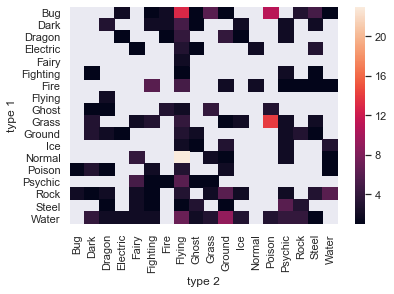

In [53]:
# Obviousely, the plot is not very nice !
# Use seaborn heatmap option to get something like this :
sns.heatmap(dual_types.groupby(['type 1','type 2']).count()['id'].unstack())

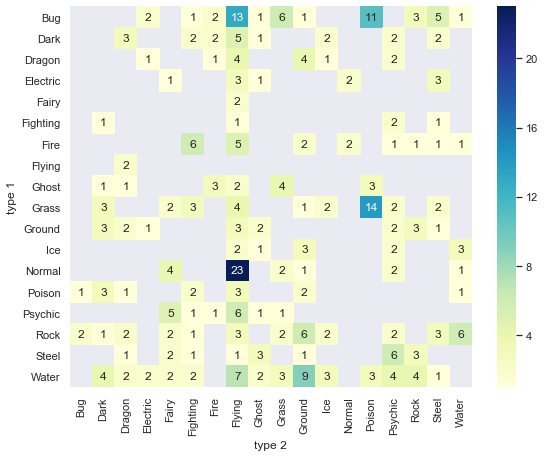

In [54]:
# Refine your seaborn expression to get a better heatmap :
plt.figure(figsize=(9,7))
sns.heatmap(dual_types.groupby(['type 1','type 2']).count()['id'].unstack(),
            annot = True, cmap="YlGnBu")

__Conclusion 3.3__: The above heatmap helps us to visualize the distribution of Type 1 and Type 2 features in the pokemons, fromw the figure above we could conclude:
* For majority of Type 1 'normal' Pokemons Type 2 feature is Flying
* The Flying in Type 2 is a popular trait for variety of Pokemons
* Besides Flying, Psychic and Ground are also popular Type 2 features
* For Type 1 feature even when Rock type has less numbers but it has combination with many of the other Type 2 features

### Are any of the statistics correlated?

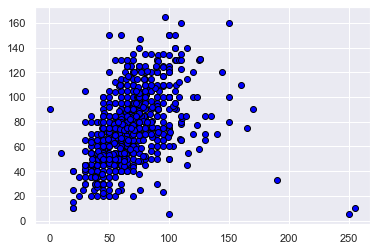

In [55]:
# It is a very natural question to ask.
# plot differernt combinations of quantities and see if you can see any correlation. Something like this:
plt.figure()
plt.scatter(poke_statistics['hp'],poke_statistics['attack'], color ='blue', edgecolors = 'black')


In [56]:
# It seems hard to see the correlation based on the scatter plots.

# Instead, use "pearsonr" function from scipy's "stats" library to compute the correlation between 
from scipy import stats
stats.pearsonr?

In [57]:
# Loop over all combinations and output the correlation coefficients. Then sort based on the coefficients

for index, stats1 in enumerate(poke_statistics.columns):
    for stats2 in poke_statistics.columns[index+1:]:
        print("{0} and {1} correlation is: ".format(stats1, stats2), stats.pearsonr(poke_statistics[stats1], poke_statistics[stats2]))

id and hp correlation is:  (0.10751217677322124, 0.003849607917929586)
id and attack correlation is:  (0.14445885485142806, 9.916167567427575e-05)
id and defense correlation is:  (0.11509032928001395, 0.0019663360015055305)
id and sp. atk correlation is:  (0.12650348628839375, 0.0006626244636161123)
id and sp. def correlation is:  (0.10499786536651357, 0.004768694565618395)
id and speed correlation is:  (0.02815610884450714, 0.4503269667059496)
id and total correlation is:  (0.16036956266580485, 1.5134852511556917e-05)
hp and attack correlation is:  (0.4258389897628539, 4.0036406508798106e-33)
hp and defense correlation is:  (0.23417725028263225, 1.9426273224356412e-10)
hp and sp. atk correlation is:  (0.36263574342561183, 7.888099966767812e-24)
hp and sp. def correlation is:  (0.38256872781199935, 1.516208697742155e-26)
hp and speed correlation is:  (0.17003077974523076, 4.408713982440297e-06)
hp and total correlation is:  (0.6426280244799402, 3.146172502840608e-85)
attack and defense

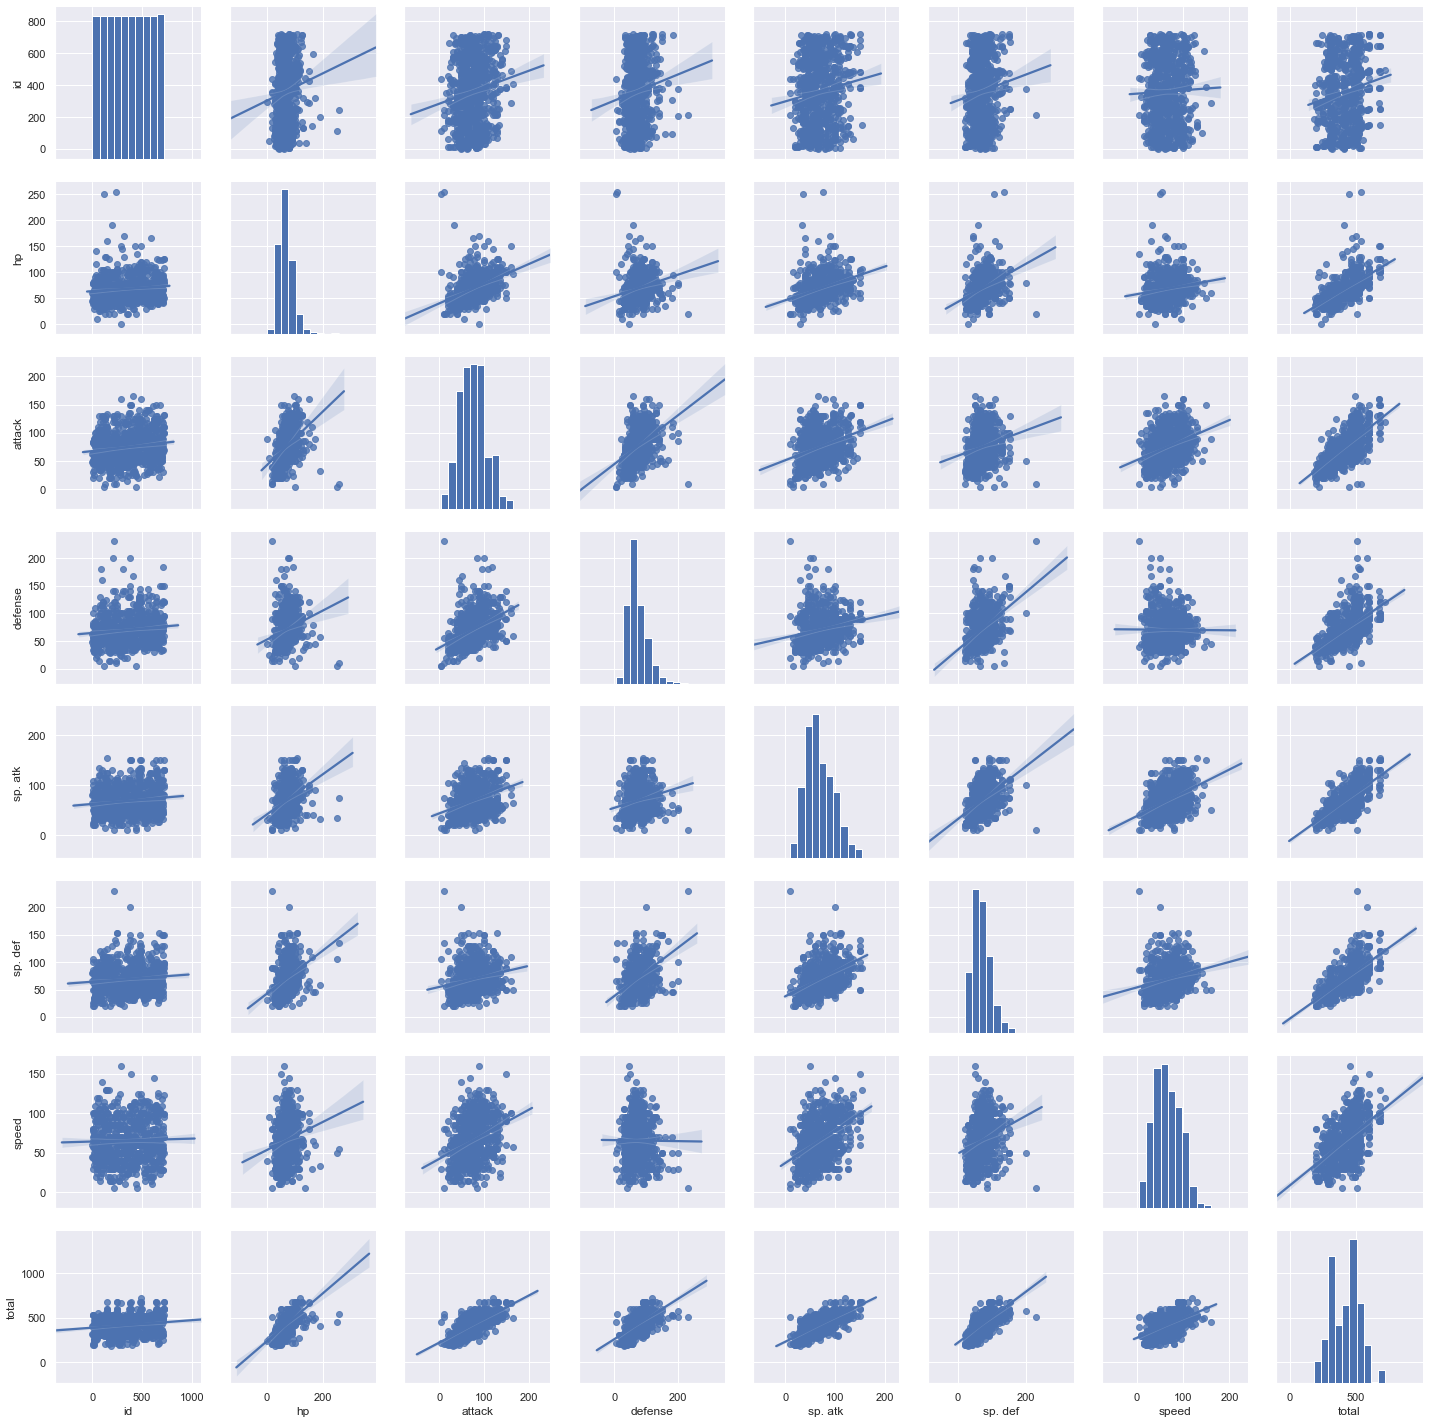

In [58]:
# Nothing is better than a good visualization. 
# Try seaborn's pairplot to get something like this :
sns.pairplot(poke_statistics, kind="reg")

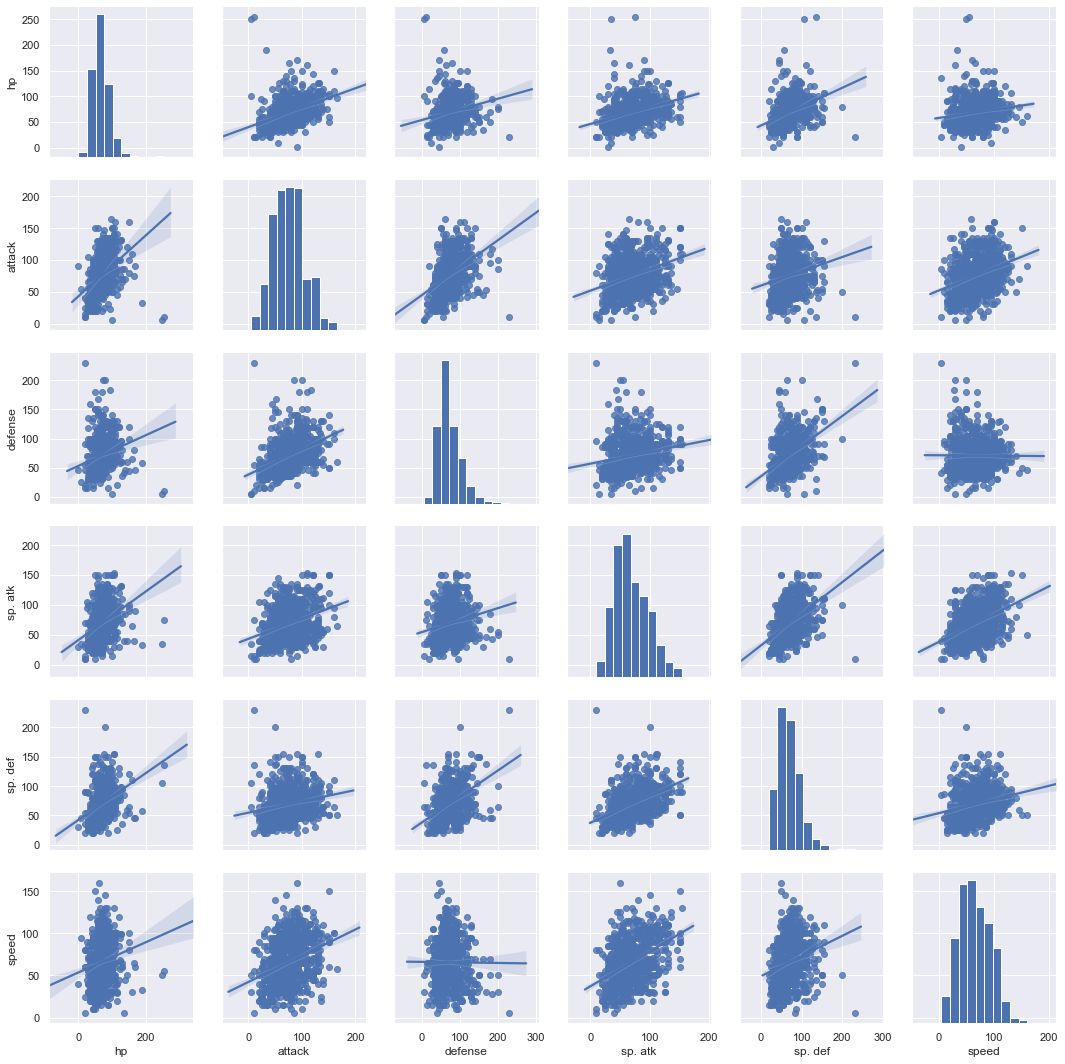

In [59]:
# Get rid of extra columns :
sns.pairplot(poke_statistics.drop(['id','total'], axis =1), kind = "reg")

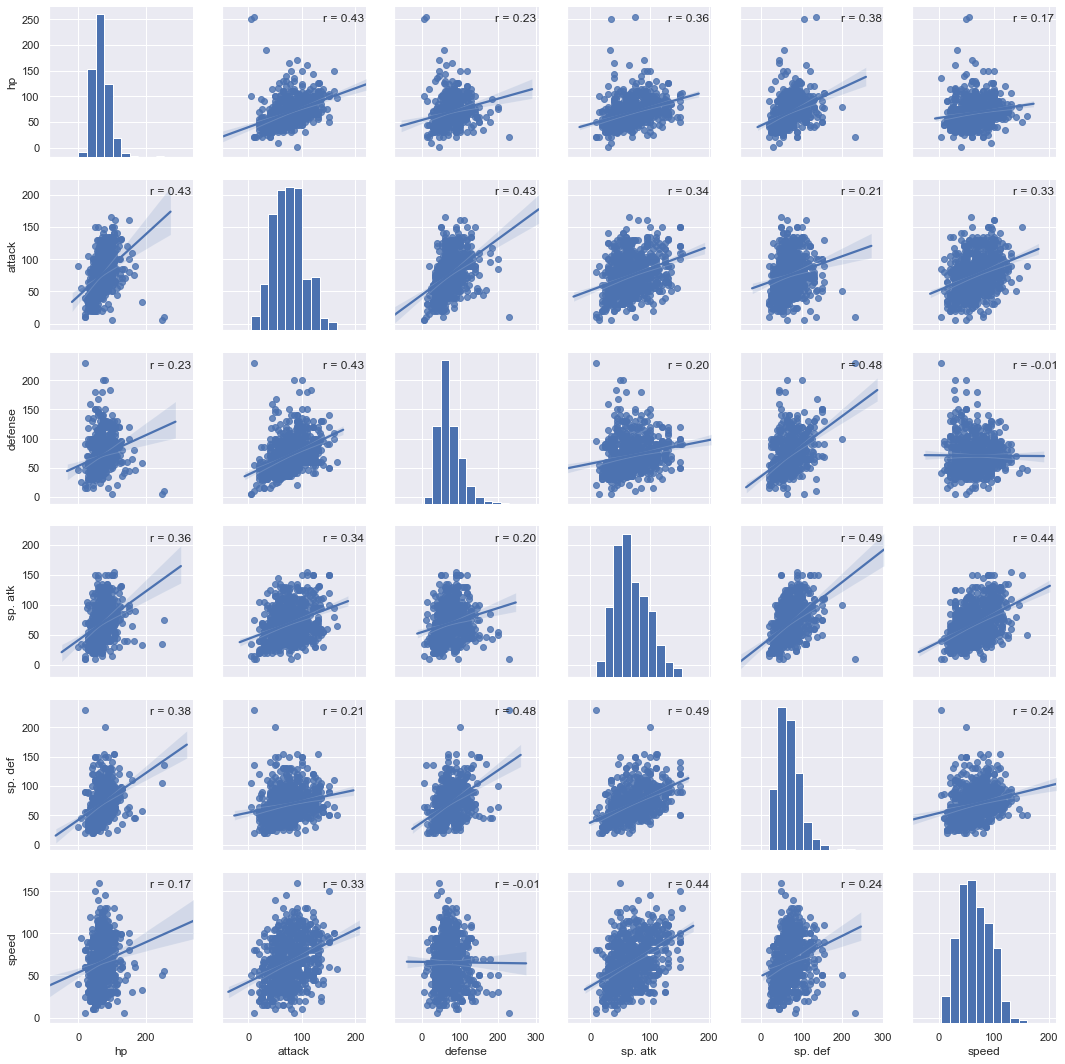

In [60]:
# See if you can refine your code to get this :
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.7, .9), xycoords=ax.transAxes)
g = sns.pairplot(poke_statistics.drop(['id','total'], axis =1), kind = "reg")
g.map_lower(corrfunc)
g.map_upper(corrfunc)

__Conclusion 3.4__: We tried to observe correlation between various Pokemon traits using the regression plotting, we could conclude that with all the values closer to 0 and less than 0.5 none of the fetures are linearly correlated with each other. <br>But, there might be possibility that these features are realted in non-linear way, we could explore it later


### What are the strongest and weakest Pokemon species?

In [60]:
# Let's do the calculations here :

print('Weakest Pokemon : ',df[df['total'] == min(df['total'])]['name'].values)

print('Strongest Pokemon : ',df[df['total'] == max(df['total'])]['name'].values)

Weakest Pokemon :  ['Sunkern']
Strongest Pokemon :  ['Arceus']


But, using 'total' is not considered a great way to assess because the scale for each column feature could be different. We could check this from the describe function

In [63]:
poke_statistics[poke_statistics.columns[1:-1]].describe()

,hp,attack,defense,sp. atk,sp. def,speed
count,721.000000,721.000000,721.000000,721.000000,721.000000,721.000000
mean,68.380028,75.124827,70.697642,68.848821,69.180305,65.714286
std,25.848272,29.070335,29.194941,28.898590,26.899364,27.277920
min,1.000000,5.000000,5.000000,10.000000,20.000000,5.000000
25%,50.000000,54.000000,50.000000,45.000000,50.000000,45.000000
50%,65.000000,75.000000,65.000000,65.000000,65.000000,65.000000
75%,80.000000,95.000000,85.000000,90.000000,85.000000,85.000000
max,255.000000,165.000000,230.000000,154.000000,230.000000,160.000000


We observe that minimum and maximum values for the different column features varies, although the column values are somewhat comparable but adding the total would give bias for 'attack' when compared with 'hp' column

Instead, we could try a different metric: by standardizing the six statistic columns independently by converting each value into a z-score so when we do take the sum, we account for the variation in the each statistic using its mean and standard deviation across all Pokemon species.<br>
So what do we do for standardization?</br>
<br><b> z score = (x-u)/sd </b></br>
<br> Here for each value <i>x</i>, <i>u</i> is mean and <i>sd</i> is standard deviation.
<br> We will define a new dataframe poke_std

In [66]:
col_names = poke_statistics.columns # taking column names
poke_std = pd.DataFrame() # defining an empty df for storing the z-scores
for col in col_names:
    poke_std[col] = (poke_statistics[col] - np.mean(poke_statistics[col]))/np.std(poke_statistics[col])

poke_std['id'] = poke_statistics['id'] # we want id to be same as in poke_statistics
poke_std.rename(columns = {'total':'std_total'}, inplace = True) # note that total would not be needed
# A new std_total would be define for storing standardized total score
poke_std['std_total'] = poke_std[col_names[1:-1]].sum(axis = 1) # we summed columns minus id & total
poke_std.head()

,id,hp,attack,defense,sp. atk,sp. def,speed,std_total
0,1,-0.905138,-0.899300,-0.743715,-0.133276,-0.155513,-0.759906,-3.596849
1,2,-0.324426,-0.451799,-0.263847,0.386141,0.402508,-0.209629,-0.461052
2,3,0.449857,0.236666,0.421679,1.078696,1.146536,0.524073,3.857508
4,4,-1.137423,-0.796031,-0.949372,-0.306415,-0.713534,-0.026204,-3.928979
5,5,-0.401854,-0.382952,-0.435228,0.386141,-0.155513,0.524073,-0.465334


In [72]:
# Let us call sum of the z-scores as 'strength' 
pokedex['strength'] = poke_std['std_total'] 

# what is the strength of top 5 pokemons?
pokedex.sort_values('strength', ascending = False).head()

,id,name,type 1,type 2,generation,legendary,strength
552,493,Arceus,Normal,None,4,True,10.886368
544,487,GiratinaAltered Forme,Ghost,Dragon,4,True,9.566219
269,249,Lugia,Psychic,Flying,2,True,9.513600
270,250,Ho-oh,Fire,Flying,2,True,9.478329
792,716,Xerneas,Fairy,None,6,True,9.432488


C:\Users\Kshitij\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


Text(0.5, 1, 'Mean strength for Type 1 and Type 2')

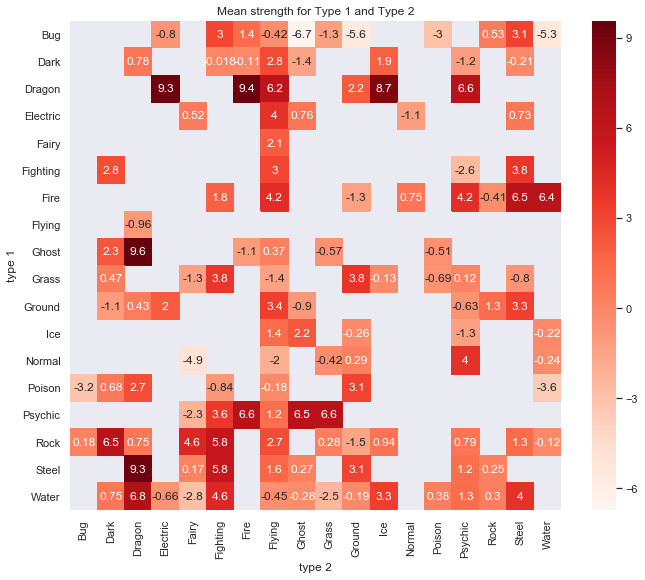

In [107]:
# Let's repeat the heatmap you created but now for the new strength metric you computed
dual_types['strength'] = pokedex[(pokedex['type 2'] != 'None')]['strength']
plt.figure(figsize = (11,9))
sns.heatmap(dual_types.groupby(['type 1','type 2']).mean()['strength'].unstack(),
            annot = True, cmap="Reds")
plt.title("Mean strength for Type 1 and Type 2")

### Do any types of Pokemon excel at certain statistics over others?

In [108]:
# Do your calculations here. Create a heat map to show this at the end.
# Lets combine the stats in dual_df
dual_types[poke_std.columns[1:-1]] = poke_std.loc[:,poke_std.columns[1:-1]]
dual_types.head()

,id,name,type 1,type 2,generation,legendary,strength,hp,attack,defense,sp. atk,sp. def,speed
0,1,Bulbasaur,Grass,Poison,1,False,-3.596849,-0.905138,-0.899300,-0.743715,-0.133276,-0.155513,-0.759906
1,2,Ivysaur,Grass,Poison,1,False,-0.461052,-0.324426,-0.451799,-0.263847,0.386141,0.402508,-0.209629
2,3,Venusaur,Grass,Poison,1,False,3.857508,0.449857,0.236666,0.421679,1.078696,1.146536,0.524073
6,6,Charizard,Fire,Flying,1,False,4.164876,0.372429,0.305512,0.250298,1.390346,0.588515,1.257776
15,12,Butterfree,Bug,Flying,1,False,-0.778709,-0.324426,-1.036993,-0.709438,0.732419,0.402508,0.157222


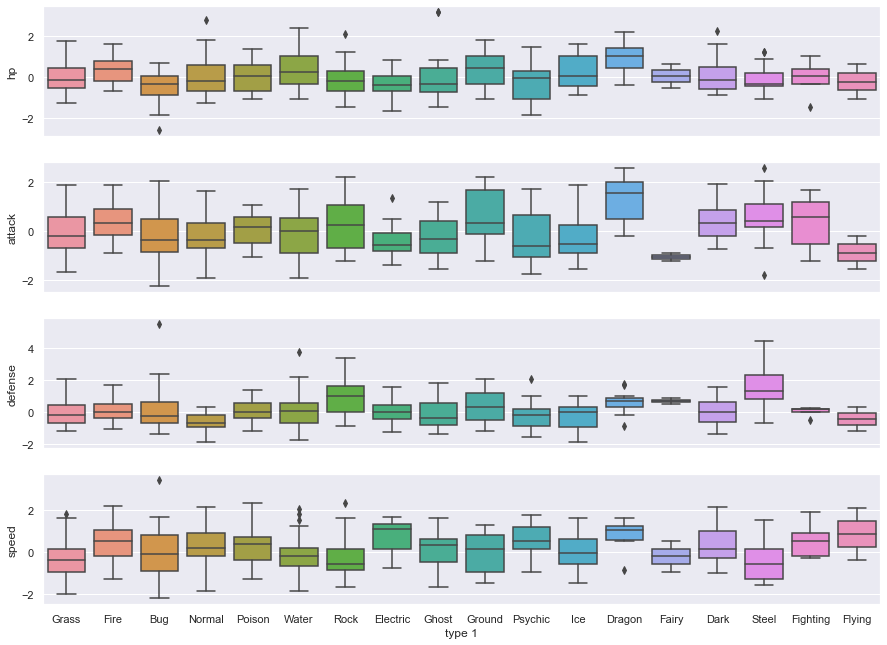

In [87]:
fig = plt.figure(figsize = (15,11))
axes1 = fig.add_subplot(4, 1, 1)
g1 = sns.boxplot(x="type 1", y="hp", data=dual_types)
g1.set_xticks([])
g1.set_xlabel('')
axes2 = fig.add_subplot(4, 1, 2)
g2 = sns.boxplot(x="type 1", y="attack", data=dual_types)
g2.set_xticks([])
g2.set_xlabel('')
axes3 = fig.add_subplot(4, 1, 3)
g3 = sns.boxplot(x="type 1", y="defense", data=dual_types)
g3.set_xticks([])
g3.set_xlabel('')
axes4 = fig.add_subplot(4, 1, 4)
g4 = sns.boxplot(x="type 1", y="speed", data=dual_types)

__Conclusion 3.5__: From the figure above we could infer that:
* The water type pokemons have better hp
* The dragon type are most agressive followed by rock and ground
* The best defense ability is with type steel and then rock
* While the speed is great in type dragon and electric

### Are any of the statistics correlated?

In [114]:
dual_types.columns

Index(['id', 'name', 'type 1', 'type 2', 'generation', 'legendary', 'strength',
       'hp', 'attack', 'defense', 'sp. atk', 'sp. def', 'speed'],
      dtype='object')

,id,name,type 1,type 2,generation,legendary
0,1,Bulbasaur,Grass,Poison,1,False
1,2,Ivysaur,Grass,Poison,1,False
2,3,Venusaur,Grass,Poison,1,False
6,6,Charizard,Fire,Flying,1,False
15,12,Butterfree,Bug,Flying,1,False
16,13,Weedle,Bug,Poison,1,False
17,14,Kakuna,Bug,Poison,1,False
18,15,Beedrill,Bug,Poison,1,False
20,16,Pidgey,Normal,Flying,1,False
21,17,Pidgeotto,Normal,Flying,1,False


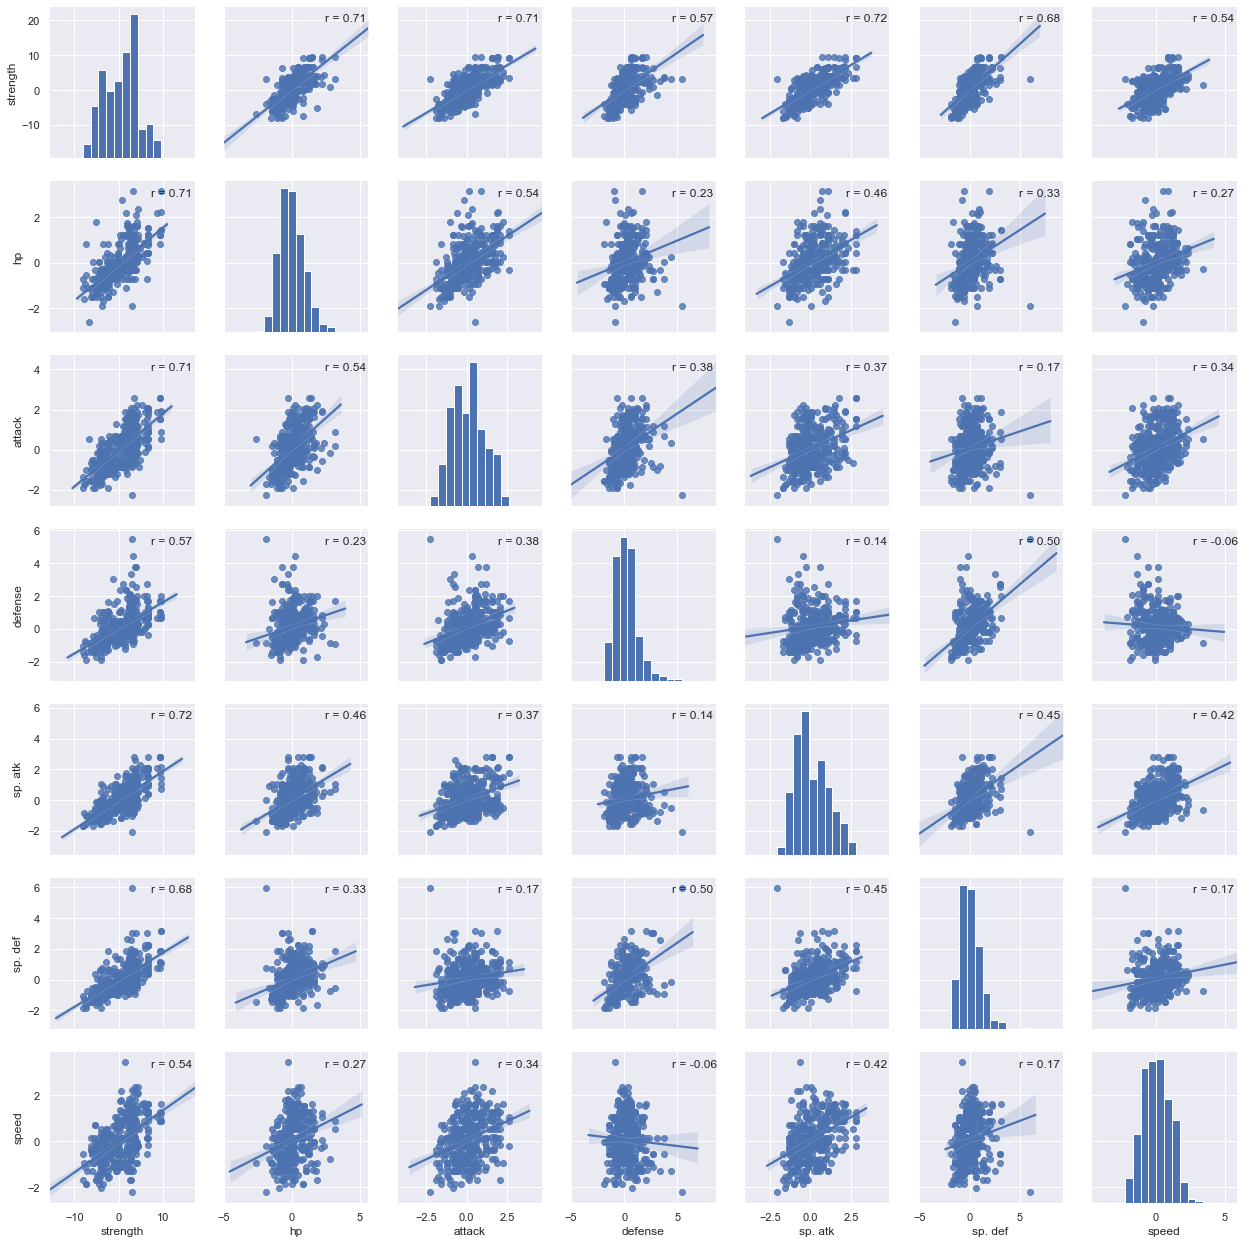

In [117]:
# Do your calculations here. Create a set of correlation plots as you did before to show this at the end.
def corrfunc(x, y, **kws):
    r, _ = stats.pearsonr(x, y)
    ax = plt.gca()
    ax.annotate("r = {:.2f}".format(r),
                xy=(.7, .9), xycoords=ax.transAxes)
g = sns.pairplot(dual_types[dual_types.columns[6:]], kind = "reg")
g.map_lower(corrfunc)
g.map_upper(corrfunc)

__Conclusion 3.5__: We can observe from the figure above that strength is more linearly correlated with hp, attack and sp. attack in comparison with others